BEST HIDDEN SIZES:  25 55  With Accuracy:  97.77777777777777

In [24]:
import numpy as np 
import os 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.io
def sigmoid(x,deriv = False):
    if not deriv:
        return 1/(1 + np.exp(-x))
    else:
        return x*(1 - x)        
mat = scipy.io.loadmat('data.mat')
data = mat['x']
print(data.shape)

(2148, 73)


In [25]:
sigmoid(1,True)

0

In [26]:
np.random.shuffle(data)

In [27]:
X = data[:,0:-1]
Y = data[:,-1]
print(Y.shape)
Y = np.reshape(Y,(Y.shape[0],1))
print(np.unique(Y,axis=0))
# Y = Y - 1
print(np.unique(Y,axis=0))
Y = Y.astype(int)
temp = np.eye(2)[(Y.T).flatten()]
Y = temp

(2148,)
[[0.]
 [1.]]
[[0.]
 [1.]]


In [28]:
X.shape

(2148, 72)

In [29]:
print(Y.shape,X.shape)

(2148, 2) (2148, 72)


In [30]:
train_size = int(0.7*X.shape[0])
test_size = X.shape[0] - train_size

In [31]:
train_X = X[:train_size,:]
test_X = X[train_size:,:]
train_Y = Y[:train_size,:]
test_Y = Y[train_size:,:]
print('train: ',train_X.shape,train_Y.shape)
print('test: ',test_X.shape,test_Y.shape)

train:  (1503, 72) (1503, 2)
test:  (645, 72) (645, 2)


In [32]:
# # feature scaling
train_X = (train_X - np.mean(train_X,axis=0))/np.std(train_X,axis=0)
test_X = (test_X - np.mean(test_X,axis=0))/np.std(test_X,axis=0)

In [33]:
instances = train_X.shape[0] # equals to train_size
classes = test_Y.shape[1]
features = train_X.shape[1]

In [34]:
num_hidden1 = 14
num_hidden2 = 15
alpha = [0.00001,0.000002,0.00002]
num_iterations = 1000

In [35]:
train_X = train_X.T
test_X = test_X.T
train_Y = train_Y.T
test_Y = test_Y.T

In [36]:
train_X.shape,train_Y.shape

((72, 1503), (2, 1503))

In [37]:
temp_X = test_X.T
temp_Y = test_Y.T

In [38]:
num_hidden1_data = []
num_hidden2_data = []
accuracy_data = []

In [39]:
losses_data = {}

In [40]:
Y.shape[1]

2

In [46]:
# for num_hidden1 in range(100,105,5):
#         for num_hidden2 in range(100,105,5):
num_hidden1 = 10
num_hidden2 = 5
np.random.seed(192)
print("start ",num_hidden1,num_hidden2)
# weights layer 1
W1 = np.random.randn(num_hidden1,X.shape[1])
b1 = np.zeros((num_hidden1,1))
# weights layer 2
W2 = np.random.randn(num_hidden2,num_hidden1)
b2 = np.zeros((num_hidden2,1))

# weights layer 2
W3 = np.random.randn(Y.shape[1],num_hidden2)
b3 = np.zeros((2,1))
loss = []
at_iteration = [] 
for iteration in range(num_iterations):
        # for iteration in range(1):
        # forward prop
        #print("hello",np.dot(W1,train_X).shape,b1.shape)
        Z1 = np.dot(W1,train_X) + b1
        A1 = sigmoid(Z1)
        Z2 = np.dot(W2,A1) + b2
        A2 = sigmoid(Z2)
        Z3 = np.dot(W3,A2) + b3
        A3 = Y_tilda = sigmoid(Z3)
       # print(Y_tilda.shape,sigmoid(A3,deriv=True).shape)
        #print("DIfference ",Y_tilda,Y)
        if iteration % 100 == 0:
                error = (np.sum(np.power((Y_tilda-train_Y),2)))/(train_size*4) # m*c*2
                loss.append(error)
                at_iteration.append(iteration)
        delta_3 = (Y_tilda - train_Y)*sigmoid(A3,deriv=True)
        #print("fucking",delta_3.shape)
        delta_2 = W3.T.dot((delta_3))*sigmoid(A2,deriv=True)
        #print(delta_3.shape,W3.shape,sigmoid(A2,deriv=True).shape)
        delta_1 = W2.T.dot((delta_2))*sigmoid(A1,deriv=True)
#                         print('deltas: ',delta_3.shape,delta_2.shape,delta_1.shape)

        #     print(Y_tilda)
        #     print(delta_3,'\n\n')
        #print("sucking",W3.shape)
        W3 = W3 - alpha[0]*np.dot(delta_3,A2.T)/classes*train_size
        b3 = b3 - alpha[0]*np.sum(delta_3,axis=1,keepdims=True)/classes*train_size
        W2 = W2 - alpha[1]*np.dot(delta_2,A1.T)/classes*train_size
        b2 = b2 - alpha[1]*np.sum(delta_2,axis=1,keepdims=True)/classes*train_size
        W1 = W1 - alpha[2]*np.dot(delta_1,train_X.T)/classes*train_size
        b1 = b1 - alpha[2]*np.sum(delta_1,axis=1,keepdims=True)/classes*train_size

#print(b1,b2,b3)
losses_data[(num_hidden1,num_hidden2)] = loss 
# print('1\n',W1,'2\n',W2,'3\n',W3,'1\n',b1,'2\n',b2,'3\n',b3)

Z1 = np.dot(W1,test_X) + b1
A1 = sigmoid(Z1)
Z2 = np.dot(W2,A1) + b2
A2 = sigmoid(Z2)
Z3 = np.dot(W3,A2) + b3
Y_tilda = sigmoid(Z3)

test = np.copy(Y_tilda)
count = 0
#print("bhai",Y_tilda.shape)
# print('train: ',train_X.shape,train_Y.shape)
# print('test: ',test_X.shape,test_Y.shape)
temp = Y_tilda.T
for i in range(test_size):
        # print(np.argmax(test[i,:]),np.argmax(temp_test[i,:]))
        if np.argmax(temp_Y[i,:]) == np.argmax(temp[i,:]):
                count += 1
                # print('true')

accuracy = count*100/test_size
print(' num_hidden_1 ',num_hidden1,' num_hidden_2 ',num_hidden2,'\n\n',accuracy)
num_hidden1_data.append(num_hidden1)
num_hidden2_data.append(num_hidden2)
accuracy_data.append(accuracy)
print("This is ",count,test_size)
# error = (np.sum(np.power((Y_tilda-test_Y),2)))/(test_size*6)
# print('\ntest error: ',error)

start  10 5
 num_hidden_1  10  num_hidden_2  5 

 87.59689922480621
This is  565 645


0
BEST HIDDEN SIZES:  10 5  With Accuracy:  87.59689922480621


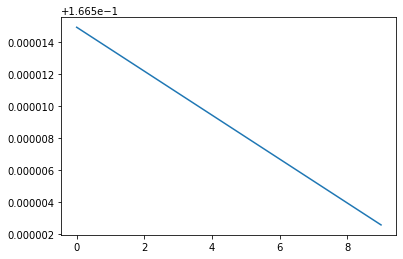

In [44]:
### Printing the plot of best accuracy
best_accuracy_index = accuracy_data.index(max(accuracy_data))
print(best_accuracy_index)
num_hidden1 = num_hidden1_data[best_accuracy_index] 
num_hidden2 = num_hidden2_data[best_accuracy_index] 
loss = losses_data[(num_hidden1,num_hidden2)]
iterations = np.arange(len(loss))
print('BEST HIDDEN SIZES: ',num_hidden1,num_hidden2,' With Accuracy: ',accuracy_data[best_accuracy_index])
plt.plot(iterations,loss)
plt.show()